# Python and Data Science
## Machine Learning
### Part 1: Linear Regression using Scikit-Learn

Libraries Used:

- [Numpy](https://www.youtube.com/watch?v=lLRBYKwP8GQ&t=1073s) - Used for making arrays
- [Pandas](https://www.youtube.com/watch?v=zN2Hua6oII0&t=8s) - Used for handling data sets
- [matplotlib](https://www.youtube.com/watch?v=nzKy9GY12yo) - Used for making charts and graphs
- [scikit-learn intro](https://www.youtube.com/watch?v=rvVkVsG49uU) - Used to handle complex mathematics
- [scikit-learn tut](https://www.youtube.com/watch?v=M9Itm95JzL0) - In depth discussion
- [pickle](https://www.youtube.com/watch?v=6Q56r_fVqgw) - Used to preserve trained models


In [30]:
# Library Imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [31]:
data = pd.read_csv("student-mat.csv", sep=";") # Getting Panda to bring in the data
print(data.head()) # Printing the first few rows of the data (the head)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [32]:
data = data[["G1", "G2","G3", "studytime", "failures", "absences"]] # Select the wanted data
print(data.head()) # Prints head of the wanted data

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


## Attributes and Labels

In machine learning:

1. **Attributes** (Features): Characteristics or properties of data used as input for algorithms. Also known as variables or features. Represented by a feature vector for each data point.

2. **Labels** (Target Variable): Values we want the model to predict or learn. The dataset is labeled in supervised learning, where each data point has an associated label serving as ground truth.

The goal is to use attributes to learn patterns and relationships that enable the model to predict labels for new, unseen data.

List the attributes here:

What is the label in this example?


In [33]:
predict = "G3" # Sets which attribute we want to predict

x = np.array(data.drop(predict, axis=1)) # Drops the whole column of G3, as we are trying to predict it (axis 1 is column)
y = np.array(data[predict])

In [34]:
# Split the data set into train and test sets. 0.1 means 10% of data is used for testing, usually 80-20
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

### Linear Regression
 Using a set of data points, the LR algorithm attempts to find a 'line of best fit' through the data.
 The 'line of best fit' is a corrrelation between the data points.
 LR is best used in a situation when there is a strong correlation of data to begin with.
 
 <table>
    <tr>
        <td>
            <img src="LR-data1.png" width="50%" />
        </td>
        <td>
            <img src="LR-data2.png" width="50%" />
        </td>
    </tr>
    <tr>
        <td>
            <p style="text-align:center">Strongly Correlated</p>
        </td>
        <td>
            <p style="text-align:center">Poorly Correlated</p>
        </td>
    </tr>
 </table>
 
 <b>Linear Equation: y = mx + b, where m is the gradient of the line.
 For any given x and a known gradient, y can be predicted.</b>

In [35]:
linear = linear_model.LinearRegression() # sets linear variable to a linear regression model

linear.fit(x_train, y_train) # Defines line of best fit
acc = linear.score(x_test, y_test) # Gets an accuracy value from the test variables (comparing)
print(acc) # Accuracies are diff for everyone bc it gets randomly shuffled

0.8067017118057151


## Save the Model with pickle

- Use the runall sutton several times until we get a high acc value

- Comment out the cell above


In [36]:
with open("studentmodel.pickle", "wb") as f: # opens a model with pickle, writing it as binary
    pickle.dump(linear, f)

In [37]:
# Load the pickle file 
pickle_in = open("studentmodel.pickle", "rb") # reads the binary, saves it to variable
linear = pickle.load(pickle_in)

In [38]:
# How to use the model (Coefficients make up the gradient)
print('Coefficient: \n', linear.coef_) # 5 attributes used, G1 is coef 1 and so on. G2 has most impact on prediction. 
print('Intercept: \n', linear.intercept_) # prints the y intercept

Coefficient: 
 [ 0.15467938  0.96273737 -0.13338088 -0.32538084  0.03671152]
Intercept: 
 -1.4288231713842805


In [39]:
predictions = linear.predict(x_test) # Grab above test data

for x in range(len(predictions)): # Grab the x test data from predictions
    print(predictions[x], x_test[x], y_test[x]) # Prints prediction, actual data, G3 (actual value)

11.925851954634435 [11 12  2  0 10] 13
12.153954379718465 [12 12  2  0 12] 11
7.920223086404121 [10  8  2  0 10] 8
18.108557881039847 [16 18  2  0  0] 18
10.58816607248126 [10 11  2  0  4] 9
8.249083492959773 [10  9  4  0  0] 0
7.243749107859294 [8 8 2 0 0] 9
18.108557881039847 [16 18  2  0  0] 19
12.870010383993554 [15 13  3  2 14] 13
10.868393033549623 [10 11  1  0  8] 10
10.62292978938984 [11 11  4  0  8] 10
11.653458290273337 [12 12  3  0  2] 11
15.432781598255442 [15 15  2  0 10] 15
5.97908175002032 [ 8  6  2  0 18] 7
9.646727207804549 [11 10  3  0  4] 11
14.91098700200239 [14 15  2  0  0] 16
8.339867354827783 [8 9 1 0 0] 8
6.118094538897565 [ 7  6  2  0 26] 6
9.667163074261262 [10 10  2  1 14] 9
12.044073394356408 [15 12  3  0  0] 14
13.412585305685996 [14 13  1  0  8] 13
10.661589115273514 [10 11  2  0  6] 11
15.587460980547217 [16 15  2  0 10] 15
5.160784537759494 [ 6  6  2  1 13] 8
12.718750508065416 [14 13  4  0  0] 14
13.542221511846478 [12 14  3  0  1] 15
6.4143926118585135

## Plot the data


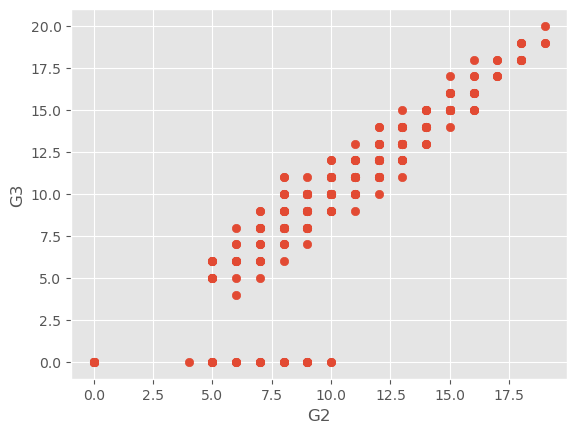

In [40]:
style.use("ggplot") # sets the style of the graph

# Set up scatter plot
p = "G2"
pyplot.scatter(data[p], data[predict]) # putting the 
pyplot.xlabel(p) # sets the x-axis to G2
pyplot.ylabel(predict) # sets the y value to the G3 prediction
pyplot.show()
